<a href="https://colab.research.google.com/github/jrohauer/ECGR4105/blob/main/HW6_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

In [3]:
#Problem 1 Data
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

#Preprocessing
from google.colab import drive
drive.mount('/content/drive')

#Problem 1
#Preprocessing
file_path = '/content/drive/My Drive/ML_data/Housing.csv'
dataset = pd.read_csv(file_path)


#Mapping text to number
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

dataset[varlist] = dataset[varlist].apply(binary_map)

dataset['furnishingstatus'] = dataset['furnishingstatus'].map({'furnished':2,'semi-furnished':1,'unfurnished':0})

#Separate Y and X inputs

dataset_norm = dataset.loc[:, dataset.columns != 'price']

#Min Max or Standard normalize
scalerMM = MinMaxScaler()
dataset_norm = scalerMM.fit_transform(dataset_norm)
Y = np.array(dataset['price'])
Y = np.resize(Y,(len(Y),1))

#Split data into training and validation
np.random.seed(17)
X_train, X_test, Y_train, Y_test = train_test_split(dataset_norm,Y, train_size = 0.8, test_size = 0.2, random_state = 100)



#Create Tensors
Y_train = torch.from_numpy(Y_train).to(torch.float32)
X_train = torch.from_numpy(X_train).to(torch.float32)
Y_test = torch.from_numpy(Y_test).to(torch.float32)
X_test = torch.from_numpy(X_test).to(torch.float32)


Mounted at /content/drive


Epoch 1, Training loss 26477600964608.0000, Validation loss 25158762889216.0000
Epoch 50, Training loss 3511314546688.0000, Validation loss 3530771136512.0000
Epoch 100, Training loss 3478616276992.0000, Validation loss 3548813983744.0000
Epoch 150, Training loss 3478581149696.0000, Validation loss 3550448975872.0000
Epoch 200, Training loss 3478581149696.0000, Validation loss 3550504026112.0000
Epoch 250, Training loss 3478581149696.0000, Validation loss 3550504550400.0000
Epoch 300, Training loss 3478581149696.0000, Validation loss 3550504550400.0000
Epoch 350, Training loss 3478581149696.0000, Validation loss 3550504550400.0000
Epoch 400, Training loss 3478581149696.0000, Validation loss 3550504550400.0000
Epoch 450, Training loss 3478581149696.0000, Validation loss 3550504550400.0000
Epoch 500, Training loss 3478581149696.0000, Validation loss 3550504550400.0000


(1.0, 500.0)

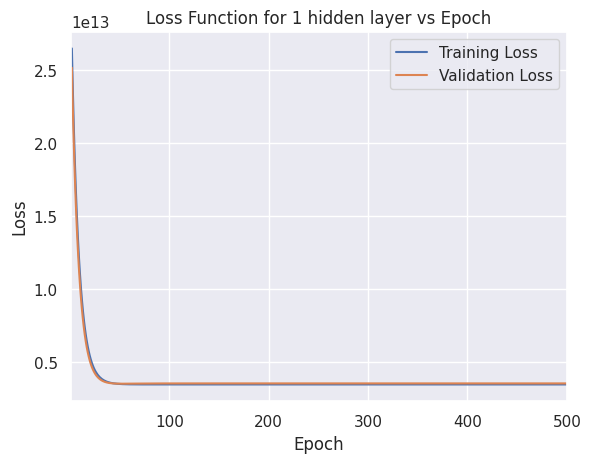

In [5]:
#Problem 1a
import torch.nn as nn

seq_model=nn.Sequential(nn.Linear(12,32),nn.Tanh(),nn.Linear(32,1))
optimizer = optim.SGD(seq_model.parameters(),lr=1e-3)



epochs=500
loss_fn=nn.MSELoss()
loss_df = pd.DataFrame(columns=['Epoch','Training Loss','Validation Loss'])


for epoch in range(1,epochs +1):
    train = seq_model(X_train)
    loss_train = loss_fn(train,Y_train)

    val = seq_model(X_test)
    loss_val = loss_fn(val,Y_test)

    optimizer.zero_grad()
    loss_train.backward()
    optimizer.step()

    loss_data= {'Epoch':epoch,'Training Loss':loss_train.detach().numpy(),'Validation Loss':loss_val.detach().numpy()}
    append_data = pd.DataFrame(data=loss_data,index=[epoch])
    loss_df = pd.concat([loss_df,append_data])

    if epoch == 1 or epoch % 50 == 0:
        print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"f" Validation loss {loss_val.item():.4f}")


# print(seq_model.hidden_linear.weight.grad)
# print(seq_model.bias)

#Plot loss over epoch
fig1, ax = plt.subplots()
ax.plot(loss_df['Training Loss'])
ax.plot(loss_df['Validation Loss'])
ax.legend(['Training Loss','Validation Loss'])
ax.set_title('Loss Function for 1 hidden layer vs Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.set_xlim(1,epochs)

Epoch 1, Training loss 5145639.0000, Validation loss 5015851.0000
Epoch 500, Training loss 5145637.5000, Validation loss 5015850.0000
Epoch 1000, Training loss 5145633.5000, Validation loss 5015846.5000
Epoch 1500, Training loss 5145627.5000, Validation loss 5015840.0000
Epoch 2000, Training loss 5145620.0000, Validation loss 5015833.0000
Epoch 2500, Training loss 5145613.0000, Validation loss 5015825.5000
Epoch 3000, Training loss 5145605.5000, Validation loss 5015818.0000
Epoch 3500, Training loss 5145598.0000, Validation loss 5015810.5000
Epoch 4000, Training loss 5145590.5000, Validation loss 5015803.5000
Epoch 4500, Training loss 5145583.5000, Validation loss 5015796.0000
Epoch 5000, Training loss 5145576.0000, Validation loss 5015788.5000


(1.0, 5000.0)

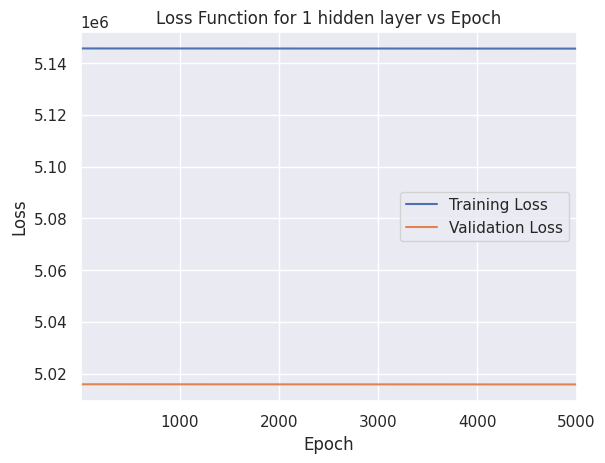

In [6]:

#Problem 1b
seq_model=nn.Sequential(nn.Linear(12,32),nn.Tanh(),nn.Linear(32,64),nn.Tanh(),nn.Linear(64,16),nn.Tanh(),nn.Linear(16,1))
optimizer = optim.SGD(seq_model.parameters(),lr=1e-3)



epochs=5000
loss_fn=nn.MSELoss()
loss_df = pd.DataFrame(columns=['Epoch','Training Loss','Validation Loss'])


for epoch in range(1,epochs +1):
    train = seq_model(X_train)
    loss_train = torch.sqrt(loss_fn(train,Y_train))

    val = seq_model(X_test)
    loss_val = torch.sqrt(loss_fn(val,Y_test))

    optimizer.zero_grad()
    loss_train.backward()
    optimizer.step()

    loss_data= {'Epoch':epoch,'Training Loss':loss_train.detach().numpy(),'Validation Loss':loss_val.detach().numpy()}
    append_data = pd.DataFrame(data=loss_data,index=[epoch])
    loss_df = pd.concat([loss_df,append_data])

    if epoch == 1 or epoch % 500 == 0:
        print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"f" Validation loss {loss_val.item():.4f}")


# print(seq_model.hidden_linear.weight.grad)
# print(seq_model.bias)

#Plot loss over epoch
fig1, ax = plt.subplots()
ax.plot(loss_df['Training Loss'])
ax.plot(loss_df['Validation Loss'])
ax.legend(['Training Loss','Validation Loss'])
ax.set_title('Loss Function for 1 hidden layer vs Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.set_xlim(1,epochs)

In [7]:
#Problem 2
from torchvision import datasets
import torch.nn as nn
import time

data_path = './'
cifar10 = datasets.CIFAR10(data_path, train=True, download=True)
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True)

from torchvision import transforms
tensor_cifar10 = datasets.CIFAR10(data_path, train=True, download=False,transform=transforms.ToTensor())
tensor_cifar10_val = datasets.CIFAR10(data_path, train=False, download=False,transform=transforms.ToTensor())

imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3)
imgs.shape

# mean = imgs.view(3, -1).mean(dim=1)
# std = imgs.view(3, -1).std(dim=1)

# transforms.Normalize(mean, std)

transformed_cifar10 = datasets.CIFAR10(
data_path, train=True, download=False,
transform=transforms.Compose([
transforms.ToTensor(),
transforms.Normalize((0.4915, 0.4823, 0.4468),
(0.2470, 0.2435, 0.2616))
]))


imgs_val = torch.stack([img_t for img_t, _ in tensor_cifar10_val], dim=3)
imgs_val.shape

mean = imgs_val.view(3, -1).mean(dim=1)
std = imgs_val.view(3, -1).std(dim=1)

transforms.Normalize(mean, std)

transformed_cifar10_val = datasets.CIFAR10(
data_path, train=False, download=False,
transform=transforms.Compose([
transforms.ToTensor(),
transforms.Normalize((0.4942, 0.4851, 0.4504),
(0.2467, 0.2429, 0.2616))
]))

100%|██████████| 170498071/170498071 [00:02<00:00, 63156416.99it/s]


Extracting ./cifar-10-python.tar.gz to ./
Files already downloaded and verified


In [8]:
import time
n_out = 10

train_loader = torch.utils.data.DataLoader(transformed_cifar10, batch_size=64,shuffle=True)

model = nn.Sequential(
nn.Linear(3072,512),
nn.Tanh(),
nn.Linear(512,10),
nn.Softmax(dim=1)
)

loss_fn = nn.NLLLoss()

learning_rate = 1e-2
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
n_epochs = 300
t0 = time.time()
for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        loss = loss_fn(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

t1=time.time()
print("Training time:" + str(t1-t0)+ " Seconds")

Epoch: 0, Loss: -0.267206
Epoch: 1, Loss: -0.182971
Epoch: 2, Loss: -0.364639
Epoch: 3, Loss: -0.501868
Epoch: 4, Loss: -0.483413
Epoch: 5, Loss: -0.530823
Epoch: 6, Loss: -0.308542
Epoch: 7, Loss: -0.517590
Epoch: 8, Loss: -0.354609
Epoch: 9, Loss: -0.329507
Epoch: 10, Loss: -0.312207
Epoch: 11, Loss: -0.332898
Epoch: 12, Loss: -0.422770
Epoch: 13, Loss: -0.475329
Epoch: 14, Loss: -0.244019
Epoch: 15, Loss: -0.502322
Epoch: 16, Loss: -0.584016
Epoch: 17, Loss: -0.545329
Epoch: 18, Loss: -0.464806
Epoch: 19, Loss: -0.655794
Epoch: 20, Loss: -0.476288
Epoch: 21, Loss: -0.468370
Epoch: 22, Loss: -0.441490
Epoch: 23, Loss: -0.282500
Epoch: 24, Loss: -0.350995
Epoch: 25, Loss: -0.402394
Epoch: 26, Loss: -0.352460
Epoch: 27, Loss: -0.557940
Epoch: 28, Loss: -0.596875
Epoch: 29, Loss: -0.431801
Epoch: 30, Loss: -0.628729
Epoch: 31, Loss: -0.461836
Epoch: 32, Loss: -0.521376
Epoch: 33, Loss: -0.504670
Epoch: 34, Loss: -0.263939
Epoch: 35, Loss: -0.469836
Epoch: 36, Loss: -0.413204
Epoch: 37, 

In [3]:
val_loader = torch.utils.data.DataLoader(tensor_cifar10_val, batch_size=64,shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
print("Accuracy: %f", correct / total)

NameError: ignored

In [2]:
#Problem 2b
from torchvision import datasets
import torch.nn as nn
import time
model2 = nn.Sequential(nn.Linear(3072, 1024),nn.Tanh(),nn.Linear(1024, 512),nn.Tanh(),nn.Linear(512, 128),nn.Tanh(),nn.Linear(128, 10),nn.LogSoftmax(dim=1))
loss_fn = nn.NLLLoss()
t0 = time.time()
n_epochs = 300
train_loader = torch.utils.data.DataLoader(transformed_cifar10, batch_size=64,shuffle=True)

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        batch_size = imgs.shape[0]
        outputs = model2(imgs.view(batch_size, -1))
        loss = loss_fn(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

t1=time.time()
print("Training time:" + str(t1-t0)+ " Seconds")
val_loader = torch.utils.data.DataLoader(tensor_cifar10_val, batch_size=64,shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        batch_size = imgs.shape[0]
        outputs = model2(imgs.view(batch_size, -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
print("Accuracy: %f", correct / total)

NameError: ignored